train loss:2.29900837810372
=== epoch:1, train acc:0.109, test acc:0.103 ===
train loss:2.2971011543841784
train loss:2.2913917077831134
train loss:2.285442745860207
train loss:2.276773239922216
train loss:2.269254858115588
train loss:2.2554990423912686
train loss:2.2159233535033795
train loss:2.198090954865529
train loss:2.158488422209808
train loss:2.170433118132255
train loss:2.082561432192511
train loss:2.109259543072282
train loss:2.019846890510645
train loss:1.9491842427464388
train loss:1.9077718375073496
train loss:1.8522526045400654
train loss:1.8626486482582538
train loss:1.7144638055318397
train loss:1.6380998652015202
train loss:1.5844270303898813
train loss:1.5174156392825995
train loss:1.4090858425662214
train loss:1.3200360089319347
train loss:1.2619568629774367
train loss:1.044168949883713
train loss:1.085248089548562
train loss:1.0350665414813482
train loss:0.9060151865890655
train loss:0.7857212960961903
train loss:0.9262511221262245
train loss:0.7674807449697757
trai

train loss:0.26171133786680184
train loss:0.18805414290435643
train loss:0.19469051195626508
train loss:0.24643631817270528
train loss:0.23950653589407128
train loss:0.10799001445343989
train loss:0.2889640238565781
train loss:0.267942144800645
train loss:0.2654473204950594
train loss:0.17077183272999114
train loss:0.2302359680260977
train loss:0.15484217470653522
train loss:0.24784540778182482
train loss:0.1422869508563791
train loss:0.33225321570895877
train loss:0.2287580608956485
train loss:0.1981425422133207
train loss:0.1694551179862516
train loss:0.14668045746471722
train loss:0.1799069058409
train loss:0.1929570560192904
train loss:0.22024887389398454
train loss:0.14636367271313996
train loss:0.2705035100409441
train loss:0.2887808194689497
train loss:0.18116991513174216
train loss:0.13120872627035532
train loss:0.16357766391199666
train loss:0.17572714599900047
train loss:0.16236580806280634
train loss:0.2000546807257292
train loss:0.14331980906415828
train loss:0.299818624199

train loss:0.07936170220276775
train loss:0.10470997482244225
train loss:0.1025292886941204
train loss:0.05678347356356169
train loss:0.07056305646438073
train loss:0.07457252970034173
train loss:0.0773330667326101
train loss:0.05780394488366885
train loss:0.05489553293091109
train loss:0.12167123890696692
train loss:0.0600267829828858
train loss:0.17895729021339743
train loss:0.03489482342855852
train loss:0.05836310180245662
train loss:0.06177045213094305
train loss:0.11666221083175748
train loss:0.11226123321011539
train loss:0.0846247787214635
train loss:0.0977306336612779
train loss:0.09235899865167915
train loss:0.05714679511923834
train loss:0.10606765781327893
train loss:0.059292582346811756
train loss:0.07086715231389579
train loss:0.0597559042284022
train loss:0.0764592346462047
train loss:0.04797447470442583
train loss:0.0445490525974282
train loss:0.03427302701012655
train loss:0.050150475916491466
train loss:0.11896027371370527
=== epoch:12, train acc:0.965, test acc:0.943

train loss:0.017750694661846027
train loss:0.02515514162175075
train loss:0.04232131455444763
train loss:0.022489966805566582
train loss:0.0337899587278569
train loss:0.021110018365646074
train loss:0.00863749110607625
train loss:0.047958341609327854
train loss:0.03500509567431163
train loss:0.024894746116958077
train loss:0.022709484062867335
train loss:0.02287311597689393
train loss:0.04027252141498546
train loss:0.033739372349163514
train loss:0.01896532739313461
train loss:0.045595275669640965
train loss:0.06767563817648872
train loss:0.018238063120035224
train loss:0.0317391556429993
train loss:0.04397296678003498
train loss:0.0382418137265786
train loss:0.10988113210949121
train loss:0.04300564666235829
train loss:0.03175641716570953
=== epoch:17, train acc:0.988, test acc:0.953 ===
train loss:0.04909183848022389
train loss:0.026197632945063224
train loss:0.15965236626350224
train loss:0.015871805782305633
train loss:0.030486287072180568
train loss:0.028565444379374753
train loss

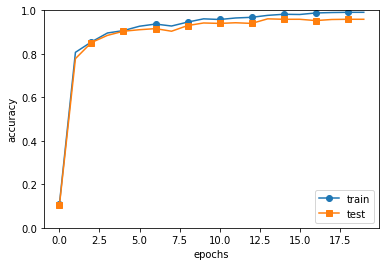

'\n=============== Final Test Accuracy ===============\ntest acc:0.959\n\n전체로 학습했을 경우 약 98%까지 가능\n'

In [1]:
import sys
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist
from common.trainer import Trainer


class SimpleConvNet:
    """
    다음과 같은 CNN을 구성한다.
    → Conv → ReLU → Pooling → Affine → ReLU → Affine → Softmax →
    전체 구현은 simple_convnet.py 참고
    """
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num': 30, 'filter_size': 5,
                             'pad': 0, 'stride': 1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        # 초기화 인수로 주어진 하이퍼파라미터를 딕셔너리에서 꺼내고 출력 크기를 계산한다.
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / \
            filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) *
                               (conv_output_size/2))

        # 1층의 합성곱 계층과 2, 3층의 완전연결 계층의 가중치와 편향 생성
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # CNN을 구성하는 계층을 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                           self.params['b1'],
                                           conv_param['stride'],
                                           conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        """추론을 수행"""
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        """손실함수 값 계산"""
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def gradient(self, x, t):
        """오차역전파법으로 기울기를 구함"""
        # 순전파
        self.loss(x, t)

        # 역전파
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db

        return grads

# 본 신경망으로 실제 MNIST 데이터셋을 학습하는 코드는 train_convnet.py 참고


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

"""
=============== Final Test Accuracy ===============
test acc:0.959

전체로 학습했을 경우 약 98%까지 가능
"""
